In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [38]:
circuits = pd.read_csv(r'dataset files\circuits.csv')
constructor_results = pd.read_csv(r'dataset files\constructor_results.csv')
constructor_standings = pd.read_csv(r'dataset files\constructor_standings.csv')
constructors = pd.read_csv(r'dataset files\constructors.csv')
driver_standings = pd.read_csv(r'dataset files\driver_standings.csv')
drivers = pd.read_csv(r'dataset files\drivers.csv')
lap_times = pd.read_csv(r'dataset files\lap_times.csv')
pit_stops = pd.read_csv(r'dataset files\pit_stops.csv')
qualifying = pd.read_csv(r'dataset files\qualifying.csv')
races = pd.read_csv(r'dataset files\races.csv')
results = pd.read_csv(r'dataset files\results.csv')
seasons = pd.read_csv(r'dataset files\seasons.csv')
sprint_results = pd.read_csv(r'dataset files\sprint_results.csv')
status = pd.read_csv(r'dataset files\status.csv')

#### Data Cleaning

In [39]:
circuits.drop('url', axis=1, inplace= True)
constructors.drop('url', axis=1, inplace= True)
drivers.drop('url', axis=1, inplace= True)
seasons.drop('url', axis=1, inplace= True)
constructor_standings.drop('positionText', axis=1, inplace= True)
races.drop(columns= ['url','fp1_date','fp1_time','fp2_date','fp2_time','fp3_date',\
                     'fp3_time','quali_date','quali_time','sprint_date','sprint_time'], axis=1, inplace=True)

In [40]:
qualifying['q2'] = qualifying['q2'].fillna('NA')
qualifying['q3'] = qualifying['q3'].fillna('NA')

In [41]:
#changing datatype for dob column in drivers and date column in races
drivers['dob']= pd.to_datetime(drivers['dob'])
races['date'] = pd.to_datetime(races['date'])

In [42]:
drivers['Name'] = drivers['forename'] +" "+ drivers['surname']

In [43]:
drivers.drop(columns= ['forename', 'surname'], axis=1, inplace= True)

In [44]:
results = results[results['fastestLapTime'].notnull()]
results['fastestLapTime'] = results['fastestLapTime'].fillna(0)

In [50]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,fastestLap_time_ms
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,87452.0
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,87739.0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,88090.0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,88603.0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,87418.0


In [51]:
results.dtypes

resultId                int64
raceId                  int64
driverId                int64
constructorId           int64
number                 object
grid                    int64
position               object
positionText           object
positionOrder           int64
points                float64
laps                    int64
time                   object
milliseconds           object
fastestLap             object
rank                   object
fastestLapTime         object
fastestLapSpeed        object
statusId                int64
fastestLap_time_ms    float64
dtype: object

In [47]:
def time_to_milliseconds(time_str):
    # Handle invalid or missing values
    if time_str == '\\N' or not time_str:
        return None  # or return 0 depending on how you want to handle missing data

    # Split the time string by ':'
    time_parts = time_str.split(':')

    # Handle cases where there are 2 parts (minutes and seconds) or 1 part (seconds only)
    if len(time_parts) == 2:
        minutes, seconds = time_parts
        milliseconds = 0
    elif len(time_parts) == 1:
        minutes = 0
        seconds = time_parts[0]
        milliseconds = 0
    else:
        minutes, seconds, milliseconds = time_parts
    
    # If seconds have a decimal, split seconds into whole and fractional parts
    if '.' in seconds:
        seconds, milliseconds = seconds.split('.')
        milliseconds = milliseconds.ljust(3, '0')  # Ensure milliseconds are 3 digits
    
    # Convert everything to integer values
    try:
        minutes = int(minutes)
        seconds = int(seconds)
        milliseconds = int(milliseconds)
    except ValueError:
        return None  # In case the value cannot be converted to an integer, return None or handle the error

    # Convert the time to milliseconds
    return (minutes * 60 * 1000) + (seconds * 1000) + milliseconds
results['fastestLap_time_ms'] = results['fastestLapTime'].apply(time_to_milliseconds)

In [24]:
display(circuits.head())
display(constructor_results.head())
display(constructor_standings.head())
display(constructors.head())
display(driver_standings.head())
display(drivers.head())
display(lap_times.head())
display(pit_stops.head())
display(qualifying.head())
display(races.head())
display(results.head())
display(seasons.head())
display(sprint_results.head())
display(status.head())

,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


,constructorStandingsId,raceId,constructorId,points,position,wins
0,1,18,1,14.0,1,1
1,2,18,2,8.0,3,0
2,3,18,3,9.0,2,0
3,4,18,4,5.0,4,0
4,5,18,5,2.0,5,0


,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


,driverId,driverRef,number,code,dob,nationality,Name
0,1,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton
1,2,heidfeld,\N,HEI,1977-05-10,German,Nick Heidfeld
2,3,rosberg,6,ROS,1985-06-27,German,Nico Rosberg
3,4,alonso,14,ALO,1981-07-29,Spanish,Fernando Alonso
4,5,kovalainen,\N,KOV,1981-10-19,Finnish,Heikki Kovalainen


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


,year
0,2009
1,2008
2,2007
3,2006
4,2005


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [13]:
from sqlalchemy import MetaData, create_engine, Column, Integer, String, Float, ForeignKey
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import sessionmaker, relationship
from sqlalchemy import text

In [14]:
metadata =MetaData()

In [15]:
# Define the SQLite database
engine = create_engine('sqlite:///f1_data.db')
Base = declarative_base()

In [49]:
# pushing dataframe into sql tables
circuits.to_sql('circuits', engine, index= False, if_exists= 'replace')
drivers.to_sql('drivers', engine, index= False, if_exists= 'replace')
driver_standings.to_sql('driver_standings', engine, index= False, if_exists= 'replace')
constructor_results.to_sql('constructor_results', engine, index= False, if_exists= 'replace')
constructor_standings.to_sql('constructor_standings', engine, index= False, if_exists= 'replace')
constructors.to_sql('constructors', engine, index= False, if_exists= 'replace')
races.to_sql('races', engine, index= False, if_exists= 'replace')
lap_times.to_sql('lap_times', engine, index= False, if_exists= 'replace')
pit_stops.to_sql('pit_stops', engine, index= False, if_exists= 'replace')
qualifying.to_sql('qualifying', engine, index = False, if_exists= 'replace')
status.to_sql('status', engine, index = False, if_exists= 'replace')
results.to_sql('results', engine, index = False, if_exists= 'replace')
sprint_results.to_sql('sprint_results', engine, index = False, if_exists= 'replace')
seasons.to_sql('seasons', engine, index = False, if_exists= 'replace')

75

#### **Circuits Distribution and Occurence**

In [55]:
#renaming column in races table
with engine.connect() as connection:
    connection.execute(text("""ALTER TABLE races
                               RENAME COLUMN name TO Grand_Prix
                            """))

In [56]:
#query to find distinct circuits name and grand prix name and returing it into Circuit_df dataframe.
query = """
        SELECT DISTINCT circuits.name, circuits.country, 
        FIRST_VALUE(races.Grand_Prix) OVER (PARTITION BY circuits.circuitId ORDER BY races.year) AS grand_prix, 
        circuits.lat, circuits.lng, COUNT(races.year) as occurence
        FROM circuits
        JOIN races ON circuits.circuitId = races.circuitId
        GROUP BY circuits.name, circuits.country
        """
Circuit_df = pd.read_sql(query, engine)

In [57]:
Circuit_df.sort_values(by= 'occurence', ascending= False, inplace= True)
Circuit_df

,name,country,grand_prix,lat,lng,occurence
13,Autodromo Nazionale di Monza,Italy,Italian Grand Prix,45.6156,9.28111,74
5,Circuit de Monaco,Monaco,Monaco Grand Prix,43.7347,7.42056,70
8,Silverstone Circuit,UK,British Grand Prix,52.0786,-1.01694,59
12,Circuit de Spa-Francorchamps,Belgium,Belgian Grand Prix,50.4372,5.97139,57
6,Circuit Gilles Villeneuve,Canada,Canadian Grand Prix,45.5000,-73.52280,43
...,...,...,...,...,...,...
55,Zeltweg,Austria,Austrian Grand Prix,47.2039,14.74780,1
62,Ain Diab,Morocco,Moroccan Grand Prix,33.5786,-7.68750,1
61,Sebring International Raceway,USA,United States Grand Prix,27.4547,-81.34830,1
63,Pescara Circuit,Italy,Pescara Grand Prix,42.4750,14.15080,1


In [58]:
fig = px.scatter_geo(data_frame= Circuit_df, lat= 'lat', lon= 'lng', hover_name= 'name',
                     hover_data= {'occurence': True, 'grand_prix': True},
                     projection= 'natural earth',
                     color= 'country')
fig.update_traces(marker = dict(line= dict(width= 0.5, color= 'black')),
                  hovertemplate= "<b>%{hovertext}<b><br>"+
                                 "<b>%{customdata[1]}<b><br>"+
                                 "occurence:  %{customdata[0]:,.0f}<br>"
                    )
fig.show()

#### **Driver Performance**

In [91]:
#driver performance 
query = """
        SELECT drivers.Name, COUNT(results.position) AS wins
        FROM drivers
        JOIN results ON drivers.driverId = results.driverId
        WHERE results.position = 1
        GROUP BY drivers.driverId
        ORDER BY wins DESC
        """
driver_performance = pd.read_sql(query, engine)
driver_performance

,Name,wins
0,Lewis Hamilton,104
1,Michael Schumacher,91
2,Max Verstappen,61
3,Sebastian Vettel,53
4,Alain Prost,51
...,...,...
109,Jean Alesi,1
110,Olivier Panis,1
111,Jarno Trulli,1
112,Robert Kubica,1


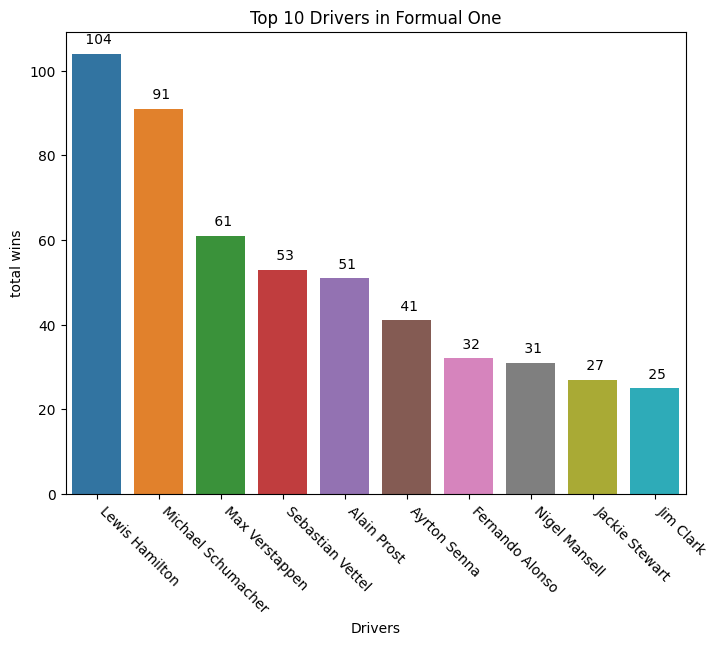

In [93]:
plt.figure(figsize= (8,6))
ax = sns.barplot(data= driver_performance.head(10), x= 'Name',y= 'wins', hue= 'Name')
plt.title('Top 10 Drivers in Formual One')
plt.ylabel('total wins')
plt.xlabel('Drivers')
plt.xticks(rotation = -45, ha= 'left',va= 'top')
for p in ax.patches:
    ax.annotate(f'{p.get_height(): .0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                xytext=(0, 5),  # Offset to move text 5 points above the bar
                textcoords='offset points')
plt.show()

#### **Constructor Performance**

In [64]:
query = """
        SELECT constructors.name, COUNT(constructor_standings.position) as wins 
        FROM constructors
        JOIN constructor_standings ON constructors.constructorId = constructor_standings.constructorId
        JOIN races ON races.raceId = constructor_standings.raceId
        WHERE (constructor_standings.position) = 1
        GROUP BY constructors.constructorId
        ORDER BY wins DESC
"""
constructor_performance = pd.read_sql(query, engine)
constructor_performance

,name,wins
0,Ferrari,234
1,McLaren,165
2,Mercedes,145
3,Red Bull,120
4,Williams,114
5,Renault,46
6,Team Lotus,44
7,Benetton,29
8,Lotus-Climax,23
9,Cooper-Climax,20


In [65]:
query = """
WITH yearly_points AS (
    SELECT 
        constructors.constructorId, 
        constructors.name, 
        races.year, 
        SUM(constructor_standings.points) AS total_points
    FROM constructors
    JOIN constructor_standings
        ON constructors.constructorId = constructor_standings.constructorId
    JOIN races
        ON races.raceId = constructor_standings.raceId
    GROUP BY constructors.constructorId, constructors.name, races.year
),
max_points_per_year AS (
    SELECT 
        year, 
        MAX(total_points) AS max_points
    FROM yearly_points
    GROUP BY year
)
SELECT 
    yp.name, 
    yp.year, 
    mp.max_points AS Points
FROM yearly_points AS yp
JOIN max_points_per_year AS mp
    ON yp.year = mp.year
    AND yp.total_points = mp.max_points
ORDER BY yp.year DESC;

"""
const = pd.read_sql(query, engine)

In [66]:
const.head(20)

,name,year,Points
0,Red Bull,2024,2706.0
1,Red Bull,2023,10158.0
2,Red Bull,2022,8439.0
3,Mercedes,2021,6915.5
4,Mercedes,2020,5476.0
5,Mercedes,2019,8631.0
6,Mercedes,2018,6903.0
7,Mercedes,2017,6928.0
8,Mercedes,2016,8085.0
9,Mercedes,2015,7139.0


In [67]:
Constructor_champions = const.groupby(by= 'name').size().reset_index(name = 'Constructor Wins')

In [70]:
Constructor_champions.sort_values('Constructor Wins', ascending= False, inplace= True)

In [71]:
fig = px.histogram(data_frame=Constructor_champions, 
                   x='name', 
                   y='Constructor Wins', 
                   title='Constructor Champions', 
                   color='name', 
                   hover_name='name', 
                   hover_data={'name': True, 'Constructor Wins': True})  # Proper hover data

# Update layout for axis titles and remove legend
fig.update_layout(
    xaxis_title='Constructors', 
    yaxis_title='Total Constructor Wins', 
    showlegend=False,
    title={'text': 'Constructor Champions', 'x': 0.5, 'yanchor': 'top', 'xanchor': 'center'}
)

# Update hover template to customize hover text
fig.update_traces(
    hovertemplate= 
                  "<b>Constructor Name: %{x}</b><br>" +  # Display the constructor name
                  "<b>Constructor Wins: %{y}</b><br>"  # Display the 'Constructor Wins'
)
fig.show()

#### fastest lap times


In [127]:
#changing data types for results column
l = ['time', 'milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed']
for i in l:
    results[i] = pd.to_numeric(results[i], errors='coerce')

In [78]:
l = ['time','milliseconds','fastestLap','fastestLapTime','position']
for i in l:
    sprint_results[i] = pd.to_numeric(sprint_results[i], errors= 'coerce')

In [ ]:
query = """
WITH fastest_lap AS(
SELECT 
drivers.driverId, drivers.Name, races.year, results.raceId, MAX(results.fastestLap_time_ms) AS fastestLap_time
FROM drivers
JOIN results
ON drivers.driverId = results.driverId
JOIN races
ON races.raceId = results.raceId
GROUP BY results.raceId
fastest_lap_count AS(
SELECT
driverId, Name, COUNT(driverId) AS Number_of_fastestLap
FROM fastest_lap
GROUP BY driverId, Name
)
SELECT
fl.driverId, fl.Name, flc.Number_of_fastestLap
FROM fastest_lap AS fl
JOIN fastest_lap_count AS flc
ON fl.driverId = flc.driverId
AND fl.Name = flc.Name
"""
Fastest_lap = pd.read_sql(query, engine)

In [57]:
Fastest_lap.sort_values('Number_of_fastestLap', ascending= False, inplace=True)

In [65]:
Fastest_lap

,driverId,Name,Number_of_fastestLap
0,1,Lewis Hamilton,344
1,1,Lewis Hamilton,344
2,1,Lewis Hamilton,344
3,1,Lewis Hamilton,344
4,1,Lewis Hamilton,344
...,...,...,...
26423,859,Liam Lawson,5
26424,859,Liam Lawson,5
26425,859,Liam Lawson,5
26426,859,Liam Lawson,5


In [62]:
with engine.connect() as connection:
    result = connection.execute(text("""
                        SELECT 
                        drivers.driverId, drivers.Name, races.year, results.raceId, MAX(results.fastestLap_time_ms) AS fastestLap_time
                        FROM drivers
                        JOIN results
                        ON drivers.driverId = results.driverId
                        JOIN races
                        ON races.raceId = results.raceId
                        GROUP BY results.raceId
                        """))
    rows = result.fetchall()
    for row in rows:
        print(row)

(12, 'Nelson Piquet Jr.', 2009, 1, 90502.0)
(16, 'Adrian Sutil', 2009, 2, 99464.0)
(15, 'Jarno Trulli', 2009, 3, 120330.0)
(67, 'Sébastien Buemi', 2009, 4, 96473.0)
(5, 'Heikki Kovalainen', 2009, 5, 88719.0)
(67, 'Sébastien Buemi', 2009, 6, 78582.0)
(21, 'Giancarlo Fisichella', 2009, 7, 94070.0)
(16, 'Adrian Sutil', 2009, 8, 83475.0)
(7, 'Sébastien Bourdais', 2009, 9, 97498.0)
(4, 'Fernando Alonso', 2009, 10, 83529.0)
(67, 'Sébastien Buemi', 2009, 11, 101042.0)
(15, 'Jarno Trulli', 2009, 12, 110029.0)
(153, 'Jaime Alguersuari', 2009, 13, 87846.0)
(154, 'Romain Grosjean', 2009, 14, 117192.0)
(67, 'Sébastien Buemi', 2009, 15, 95392.0)
(6, 'Kazuki Nakajima', 2009, 16, 75073.0)
(153, 'Jaime Alguersuari', 2009, 17, 103318.0)
(16, 'Adrian Sutil', 2008, 18, 92021.0)
(16, 'Adrian Sutil', 2008, 19, 100330.0)
(18, 'Jenson Button', 2008, 20, 96125.0)
(19, 'Anthony Davidson', 2008, 21, 86864.0)
(16, 'Adrian Sutil', 2008, 22, 88780.0)
(14, 'David Coulthard', 2008, 23, 102112.0)
(16, 'Adrian Sutil',

In [126]:
with engine.connect() as connection:
    result = connection.execute(text("""
                        PRAGMA table_info(results)
                        """))
    rows = result.fetchall()
    for row in rows:
        print(row)

(0, 'resultId', 'BIGINT', 0, None, 0)
(1, 'raceId', 'BIGINT', 0, None, 0)
(2, 'driverId', 'BIGINT', 0, None, 0)
(3, 'constructorId', 'BIGINT', 0, None, 0)
(4, 'number', 'TEXT', 0, None, 0)
(5, 'grid', 'BIGINT', 0, None, 0)
(6, 'position', 'TEXT', 0, None, 0)
(7, 'positionText', 'TEXT', 0, None, 0)
(8, 'positionOrder', 'BIGINT', 0, None, 0)
(9, 'points', 'FLOAT', 0, None, 0)
(10, 'laps', 'BIGINT', 0, None, 0)
(11, 'time', 'FLOAT', 0, None, 0)
(12, 'milliseconds', 'FLOAT', 0, None, 0)
(13, 'fastestLap', 'FLOAT', 0, None, 0)
(14, 'rank', 'FLOAT', 0, None, 0)
(15, 'fastestLapTime', 'FLOAT', 0, None, 0)
(16, 'fastestLapSpeed', 'FLOAT', 0, None, 0)
(17, 'statusId', 'BIGINT', 0, None, 0)


In [52]:
results.to_sql('results', engine, index = False, if_exists= 'replace')

26519